<a href="https://colab.research.google.com/github/Jipsonmv/Hand-Writting-Recognition-Project/blob/main/step5_1_hand_writting_recognition_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Neural Network with Keras for MNIST handwritten classification and recognition

Welcome to this end-to-end project that will include various design logics that are required to create stable training and evaluation deep neural network models !

We are going to employ the keras based python deep learning framework that readily offers complex mathematical layers that compute and form weights that are resultant of the data the model is viewing and learning from and then predict on new dataset.

Keras automates large amount of mathetmatical design that helps to rapidly develop and protype datasets and ML logic

![keras basic nn](https://user-images.githubusercontent.com/67789350/102743004-6dad1f00-437c-11eb-9c77-b1c97bceafaf.png)

## Section O : Things to Know 

- Understand how to call in or import [Keras-Based](https://en.wikipedia.org/wiki/Keras) mathematical layers into your colab environment 
- Spend time on how a neural network is built and the logic to implement efficient and [Optimal Training Networks](https://en.wikipedia.org/wiki/Convolutional_neural_network) for image classification 
- Explore the official documentation about the [MNIST Dataset](https://en.wikipedia.org/wiki/MNIST_database)

## Section D : Load the data in 

- Let's load in the dataset using Keras 

In [48]:
# imports for array-handling and plotting
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt

# let's keep our keras backend tensorflow quiet
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
# for testing on CPU
#os.environ['CUDA_VISIBLE_DEVICES'] = ''

# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [49]:
from keras.datasets import mnist 

(X_train, y_train),(X_test,y_test) = mnist.load_data()

print('Train: X = {}, y = {}'.format(X_train.shape, y_train.shape)) 
print('Test: X = {}, y = {}'.format(X_test.shape, y_test.shape))

Train: X = (60000, 28, 28), y = (60000,)
Test: X = (10000, 28, 28), y = (10000,)


## Section I.I : Initial Data Indagation

- Start off by understanding what MNIST Data is in more detail
- Note down the dimensions and other practical information about the MNIST dataset
- Load in the dataset into your Colab Environment [Using Keras Datasets]

## Section I.II : Initial EDA

- Explore the datasets descriptive statistics if needed
- Create graphs of the counts of each class
- Make deductions upon the class distribution 

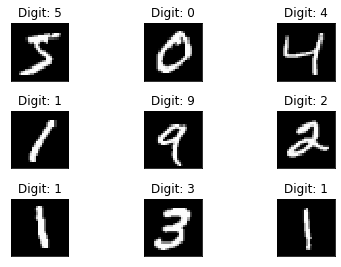

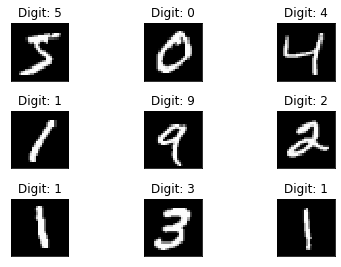

In [50]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

## Section II : Data Preparation 

- Normalize the pixel value of the all images 
- Why is scaling of the pixel value required ? Make a note
- Explain the difference between pre-processed images and the normalized images

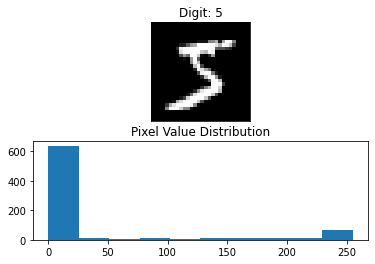

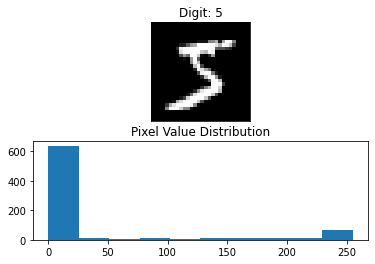

In [51]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig

In [52]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 28, 28)
Test matrix shape (10000, 28, 28)


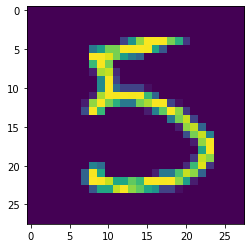

In [53]:
plt.imshow(X_test[15])

In [54]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


## Section III : Model Construction 

- What sort of Neural Network would you employ for this problem statement ?
- Write down the skeleton flow of the model 
- Create a baseline model 
- Train the model

In [56]:
import tensorflow as tf

In [57]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(Dropout(0.2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=512, activation= 'relu'))

model.add(tf.keras.layers.Dense(units=10, activation= 'softmax'))

In [58]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 5, 5, 48)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1200)             

In [59]:
# compiling the sequential model
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [61]:
# training the model and saving metrics in history
history = model.fit(X_train,y_train,epochs=10, batch_size=128, validation_split=0.1 )

Epoch 1/10
422/422 [==============================] - 46s 107ms/step - loss: 0.1989 - accuracy: 0.0990 - val_loss: 0.0625 - val_accuracy: 0.0960
Epoch 2/10
422/422 [==============================] - 43s 102ms/step - loss: 0.0616 - accuracy: 0.0989 - val_loss: 0.0418 - val_accuracy: 0.0967
Epoch 3/10
422/422 [==============================] - 43s 102ms/step - loss: 0.0427 - accuracy: 0.0991 - val_loss: 0.0362 - val_accuracy: 0.0970
Epoch 4/10
422/422 [==============================] - 43s 102ms/step - loss: 0.0329 - accuracy: 0.0988 - val_loss: 0.0380 - val_accuracy: 0.0975
Epoch 5/10
422/422 [==============================] - 45s 106ms/step - loss: 0.0267 - accuracy: 0.0991 - val_loss: 0.0382 - val_accuracy: 0.0965
Epoch 6/10
422/422 [==============================] - 43s 102ms/step - loss: 0.0219 - accuracy: 0.0989 - val_loss: 0.0339 - val_accuracy: 0.0975
Epoch 7/10
422/422 [==============================] - 43s 102ms/step - loss: 0.0187 - accuracy: 0.0990 - val_loss: 0.0301 - val_ac

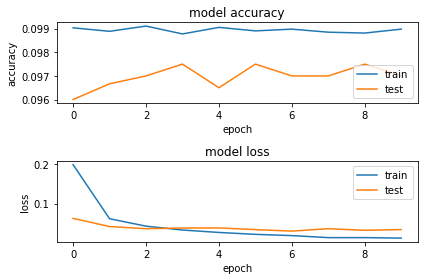

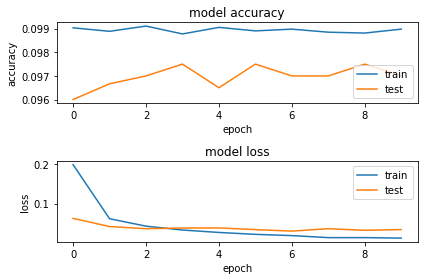

In [65]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

## Section IV : Model Evaluation 

- It is recommeded to to use Kfolds to evaluate your model, what other validation process could you employ ? 
- What would be the best value for K and why for this baseline model 
- Evaluate the model accordingly and make a note of it's performance with respect to it's accuracy

In [62]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print(scores)

Baseline Error: 90.25%
[0.0266858097165823, 0.09749999642372131]


An acceptable accuracy level has been reached, so no further procedure is needed!

Model prediction is 5


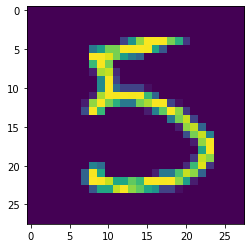

In [63]:
plt.imshow(X_test[15])
pred = model.predict(X_test)
print("Model prediction is", np.argmax(pred[15]))

Model prediction is 9


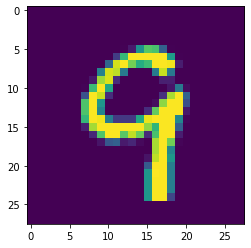

In [64]:
plt.imshow(X_test[150])
pred = model.predict(X_test)
print("Model prediction is", np.argmax(pred[150]))